In [2]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import scipy as sp
from plot_pca import plot_pca

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
mice = ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5',
     '4139251.1','4139251.2','4139260.1','4139260.2','4139261.2','4139266.3','4139265.4',
     '4139265.3','4139265.5']
df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]




G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [29]:
mouse ='4222153.3' #mice[0]
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1731,4222153.3,08_04_2019,2,TwoTower_foraging,120,1,CA1,2019-04-08,G:\My Drive\VR_Data\TwoTower\4222153.3\08_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.3\08_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.3\08_04_2...
1754,4222153.3,10_04_2019,2,TwoTower_foraging,120,1,CA1,2019-04-10,G:\My Drive\VR_Data\TwoTower\4222153.3\10_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.3\10_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.3\10_04_2...
1774,4222153.3,12_04_2019,2,TwoTower_foraging,99,1,CA1,2019-04-12,G:\My Drive\VR_Data\TwoTower\4222153.3\12_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.3\12_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.3\12_04_2...
1791,4222153.3,14_04_2019,2,TwoTower_foraging,97,1,CA1,2019-04-14,G:\My Drive\VR_Data\TwoTower\4222153.3\14_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.3\14_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.3\14_04_2...
1806,4222153.3,15_04_2019,2,TwoTower_foraging,69,1,CA1,2019-04-15,G:\My Drive\VR_Data\TwoTower\4222153.3\15_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.3\15_04_2...,None
1807,4222153.3,15_04_2019,3,TwoTower_foraging,40,1,CA2/CA3,2019-04-15,G:\My Drive\VR_Data\TwoTower\4222153.3\15_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.3\15_04_2...,None


In [30]:
sess = df_mouse.iloc[-3]
sess

MouseName                                                4222153.3
DateFolder                                              14_04_2019
SessionNumber                                                    2
Track                                            TwoTower_foraging
RewardCount                                                     97
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-04-14 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4222153.3\14_04_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4222153.3\14_04_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4222153.3\14_04_2...
Name: 1791, dtype: object

In [31]:

VRDat,C, S, A = pp.load_scan_sess(sess,fneu_coeff=.7,analysis='s2p')
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
pcnt = np.zeros([VRDat.shape[0],])
for i,(start,stop) in enumerate(zip(tstart_inds,teleport_inds)):
    pcnt[start:stop] = int(trial_info['rewards'][i]>0)

S = sp.ndimage.filters.gaussian_filter1d(S,10.,axis=0)

num aberrant ttls 0.0
29849 (29849,) (29849, 21) 97280


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


(29849, 504)
(29849,)
(4471,) (4471, 504)


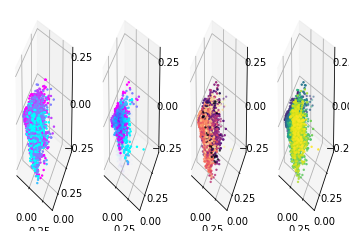

In [32]:

f,ax = plot_pca(S,VRDat,pcnt,plot_err=True)

In [23]:
sum(pcnt)

13383.0

In [24]:
pcnt.shape

(23163,)